In [1]:
# 15 year mean of countries in East Asia & Pacific match Europe & Central Asia & Americas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_worldbank_csv(data_path, meta_data_path):
    """
    
    """
    import pandas as pd
    data_df = pd.read_csv(data_path, header=0, skiprows=4)
    meta_data_df = pd.read_csv(meta_data_path, header=0)
    merged_df = data_df.merge(right=meta_data_df[['Country Code', 'Region', 'IncomeGroup']],
                              how='inner',
                              on='Country Code')
    return merged_df

In [4]:
fert_data_path = 'data-unzipped-worldbank/SP.DYN.TFRT.IN/API_SP.DYN.TFRT.IN_DS2_en_csv_v2_248489.csv'
fert_meta_data_path = 'data-unzipped-worldbank/SP.DYN.TFRT.IN/Metadata_Country_API_SP.DYN.TFRT.IN_DS2_en_csv_v2_248489.csv'
raw_fertility_df = read_worldbank_csv(data_path=fert_data_path,
                                      meta_data_path=fert_meta_data_path)

In [8]:
def clean_fertility_data(dataframe, sampled_years):
    # Removing unnecessary columns
    dataframe = dataframe[['Country Name', 'Country Code',
                           'Region', 'IncomeGroup']+sampled_years].copy()
    # Removing rows with missing data then resetting the index
    dataframe.dropna(axis=0, how='any', inplace=True)
    dataframe.reset_index(inplace=True, drop=True)
    # Calculating the mean of the sampled years for each country
    dataframe['sampled_mean'] = dataframe[sampled_years].mean(axis=1)
    dataframe['sampled_mean'] = dataframe['sampled_mean'].apply(lambda x: round(x, 4))
    # Renaming the columns
    dataframe.rename(columns={'Country Name': 'country_name',
                              'Country Code': 'country_code',
                              'Region': 'region',
                              'IncomeGroup': 'income_group'},
                     inplace=True)
    return dataframe

In [9]:
# Defining the years over which the means will be compared
sampled_years = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                 '2011', '2012', '2013', '2014', '2015', '2016', '2017']
# Generating a cleaned global fertility dataframe with countries missing values removed and the means calculated
fertility_df = clean_fertility_data(raw_fertility_df, sampled_years)

,country_name,country_code,region,income_group,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,sampled_mean
0,Aruba,ABW,Latin America & Caribbean,High income,1.803,1.787,1.774,1.765,1.760,1.759,1.761,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.8007
1,Afghanistan,AFG,South Asia,Low income,7.148,7.016,6.875,6.722,6.555,6.373,6.180,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,5.9406
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,6.533,6.499,6.461,6.419,6.372,6.320,6.260,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,6.1396
3,Albania,ALB,Europe & Central Asia,Upper middle income,1.897,1.821,1.755,1.704,1.671,1.654,1.652,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.7015
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2.337,2.247,2.161,2.081,2.006,1.939,1.877,1.819,1.763,1.708,1.651,1.595,1.541,1.491,1.448,1.8443


In [14]:
# Creating
world_exclude_ss_africa = fertility_df.loc[fertility_df.region != 'Sub-Saharan Africa']
world_exclude_ss_africa.reset_index(inplace=True, drop=True)


eurasia_e_asia_americas = fertility_df.loc[(fertility_df.region != 'Sub-Saharan Africa')
                                              & (fertility_df.region != 'South Asia')]
eurasia_e_asia_americas.reset_index(inplace=True, drop=True)


eurasia = fertility_df.loc[(fertility_df.region == 'Europe & Central Asia') | (
                            fertility_df.region == 'Middle East & North Africa')]
eurasia.reset_index(inplace=True, drop=True)


east_asia = fertility_df.loc[fertility_df.region == 'East Asia & Pacific']
east_asia.reset_index(inplace=True, drop=True)


americas = fertility_df.loc[(fertility_df.region == 'Latin America & Caribbean') | (
                             fertility_df.region == 'North America')]
americas.reset_index(inplace=True, drop=True)

In [15]:
def dist_plots(dfs_list, titles_list, sample_col):
    import math
    import seaborn as sns
    import matplotlib.pyplot as plt
    length = len(titles_list)
    ncols = min(length, 3)
    nrows = math.ceil(length / 3)
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 10))
    row = 0
    col = 0
    for i in range(length):
        ax = axes[row, col]
        data = dfs_list[i][sample_col]
        mean = round(data.mean(), 3)
        sns.distplot(data, ax = ax)
        ax.axvline(x=mean, ymin=0, ymax=1, color='red')
        ax.annotate(s="Mean = "+str(mean),
                    xy=(mean, ax.get_ylim()[1]/2),
                    xytext=(20, 20),
                    textcoords='offset points')
        ax.set_title(titles_list[i])
        if col < 2:
            col += 1
        else:
            col = 0
            row += 1
    plt.subplots_adjust(hspace=0.3)

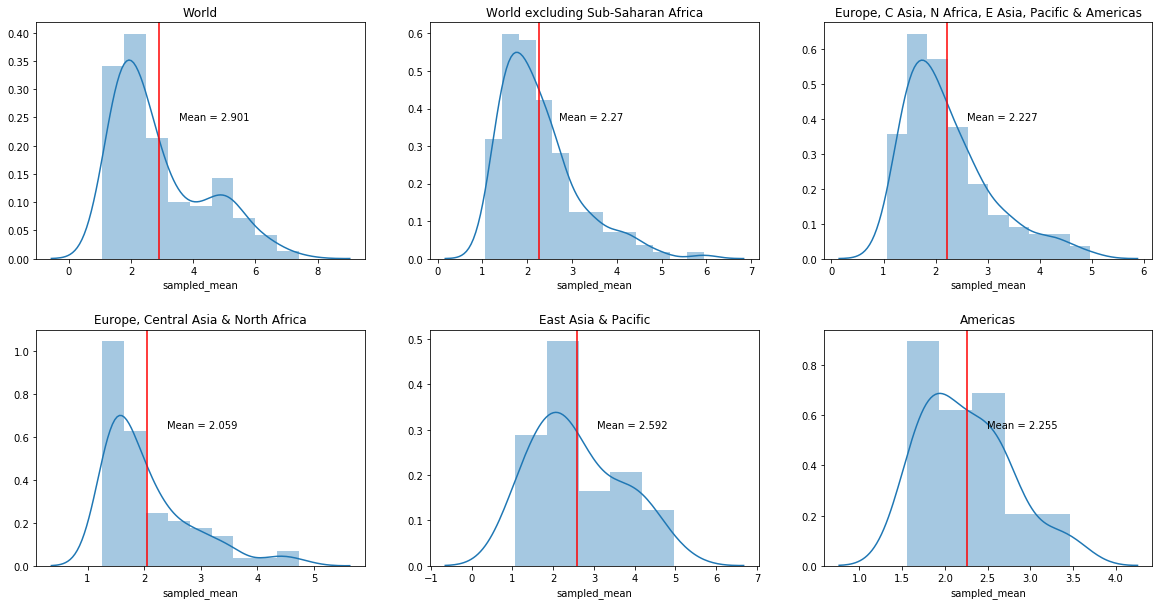

In [16]:
dfs_list = [fertility_df, world_exclude_ss_africa,
            eurasia_e_asia_americas,
            eurasia, east_asia, americas]

titles_list = ['World', 'World excluding Sub-Saharan Africa',
               'Europe, C Asia, N Africa, E Asia, Pacific & Americas',
               'Europe, Central Asia & North Africa', 'East Asia & Pacific', 'Americas']

dist_plots(dfs_list=dfs_list, titles_list=titles_list, sample_col='sampled_mean')

In [17]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [18]:
# Eurasia and East Asia
eur_asia_stat, eur_asia_p = ttest_ind(eurasia['sampled_mean'],
                                      east_asia['sampled_mean'],
                                      equal_var=False)
print(eur_asia_stat)
print(eur_asia_p)

-2.466851744196622
0.017626888096591263


In [19]:
# Eurasia and Americas
eur_amer_stat, eur_amer_p = ttest_ind(eurasia['sampled_mean'],
                                      americas['sampled_mean'],
                                      equal_var=False)
print(eur_amer_stat)
print(eur_amer_p)

-1.5848152619584996
0.11606502355213748


In [20]:
# Americas and East Asia
amer_asia_stat, amer_asia_p = ttest_ind(americas['sampled_mean'],
                                        east_asia['sampled_mean'],
                                        equal_var=False)
print(amer_asia_stat)
print(amer_asia_p)

-1.579634049908257
0.12189491319514077


In [22]:
# ANOVA of all 3
f_stat, f_p = f_oneway(eurasia['sampled_mean'],
                       east_asia['sampled_mean'],
                       americas['sampled_mean'])
print(f_stat)
print(f_p)

4.823853304220178
0.009420151972572165


In [ ]:
# investigate assumptions
# 1 - continuous distribution - yes 
# 2 - Data selected from a representative random sample - I believe so, I purposefully chose geographies with varying income levels
# 2a - I believe the problem with eurasia was that it over-sampled low fertility european countries, and very few mid-fertility countries
# 3 - Data results in a bell curve when plotted - approximately, but positive skew appears to have impacted the analysis
# 4 - Data is of a reasonably sized sample of over 30 countries per region 
# 5 - Homoscedasticity is impacted by the skew of the data